For Tabular Playground Series - October 2021 , we have a synthetic dataset generated using CTGAN and the original dataset deals with predicting the biological response of molecules given various chemical properties.. Although the features are anonymized, they have properties relating to real-world features.

The goal is to a binary target based on a number of feature columns given in the data. The columns are a mix of scaled continuous features and binary features.The data is synthetically generated by a GAN that was trained on real-world molecular response data.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")
sample_submid = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
0,0,0.205979,0.410993,0.176775,0.223581,0.423543,0.476140,0.413590,0.612021,0.534873,...,0,1,0,0,0,0,0,0,0,1
1,1,0.181004,0.473119,0.011734,0.213657,0.619678,0.441593,0.230407,0.686013,0.281971,...,0,1,0,0,0,0,0,0,0,1
2,2,0.182583,0.307431,0.325950,0.207116,0.605699,0.309695,0.493337,0.751107,0.536272,...,0,0,0,1,1,0,0,0,0,1
3,3,0.180240,0.494592,0.008367,0.223580,0.760618,0.439211,0.432055,0.776147,0.483958,...,0,0,0,0,1,0,0,0,0,1
4,4,0.177172,0.495513,0.014263,0.548819,0.625396,0.562493,0.117158,0.561255,0.077115,...,0,1,1,0,1,0,0,1,0,1


In [4]:
print('Number of null values in training set:',train.isnull().sum().sum())
print('Number of null values in test set:',test.isnull().sum().sum())

Number of null values in training set: 0
Number of null values in test set: 0


In [5]:
binary_features = []
continuos_features = []
for i in train.columns:
    #print(i,len(train[i].unique()))
    if i == train.columns[0]:
        continue
    if i == train.columns[-1]:
        break
    if len(train[i].unique()) == 2:
        binary_features.append(i)
    if len(train[i].unique()) > 2:
        continuos_features.append(i)

print('number of binary features:',len(binary_features))
print('number of continuos features',len(continuos_features))


number of binary features: 45
number of continuos features 240


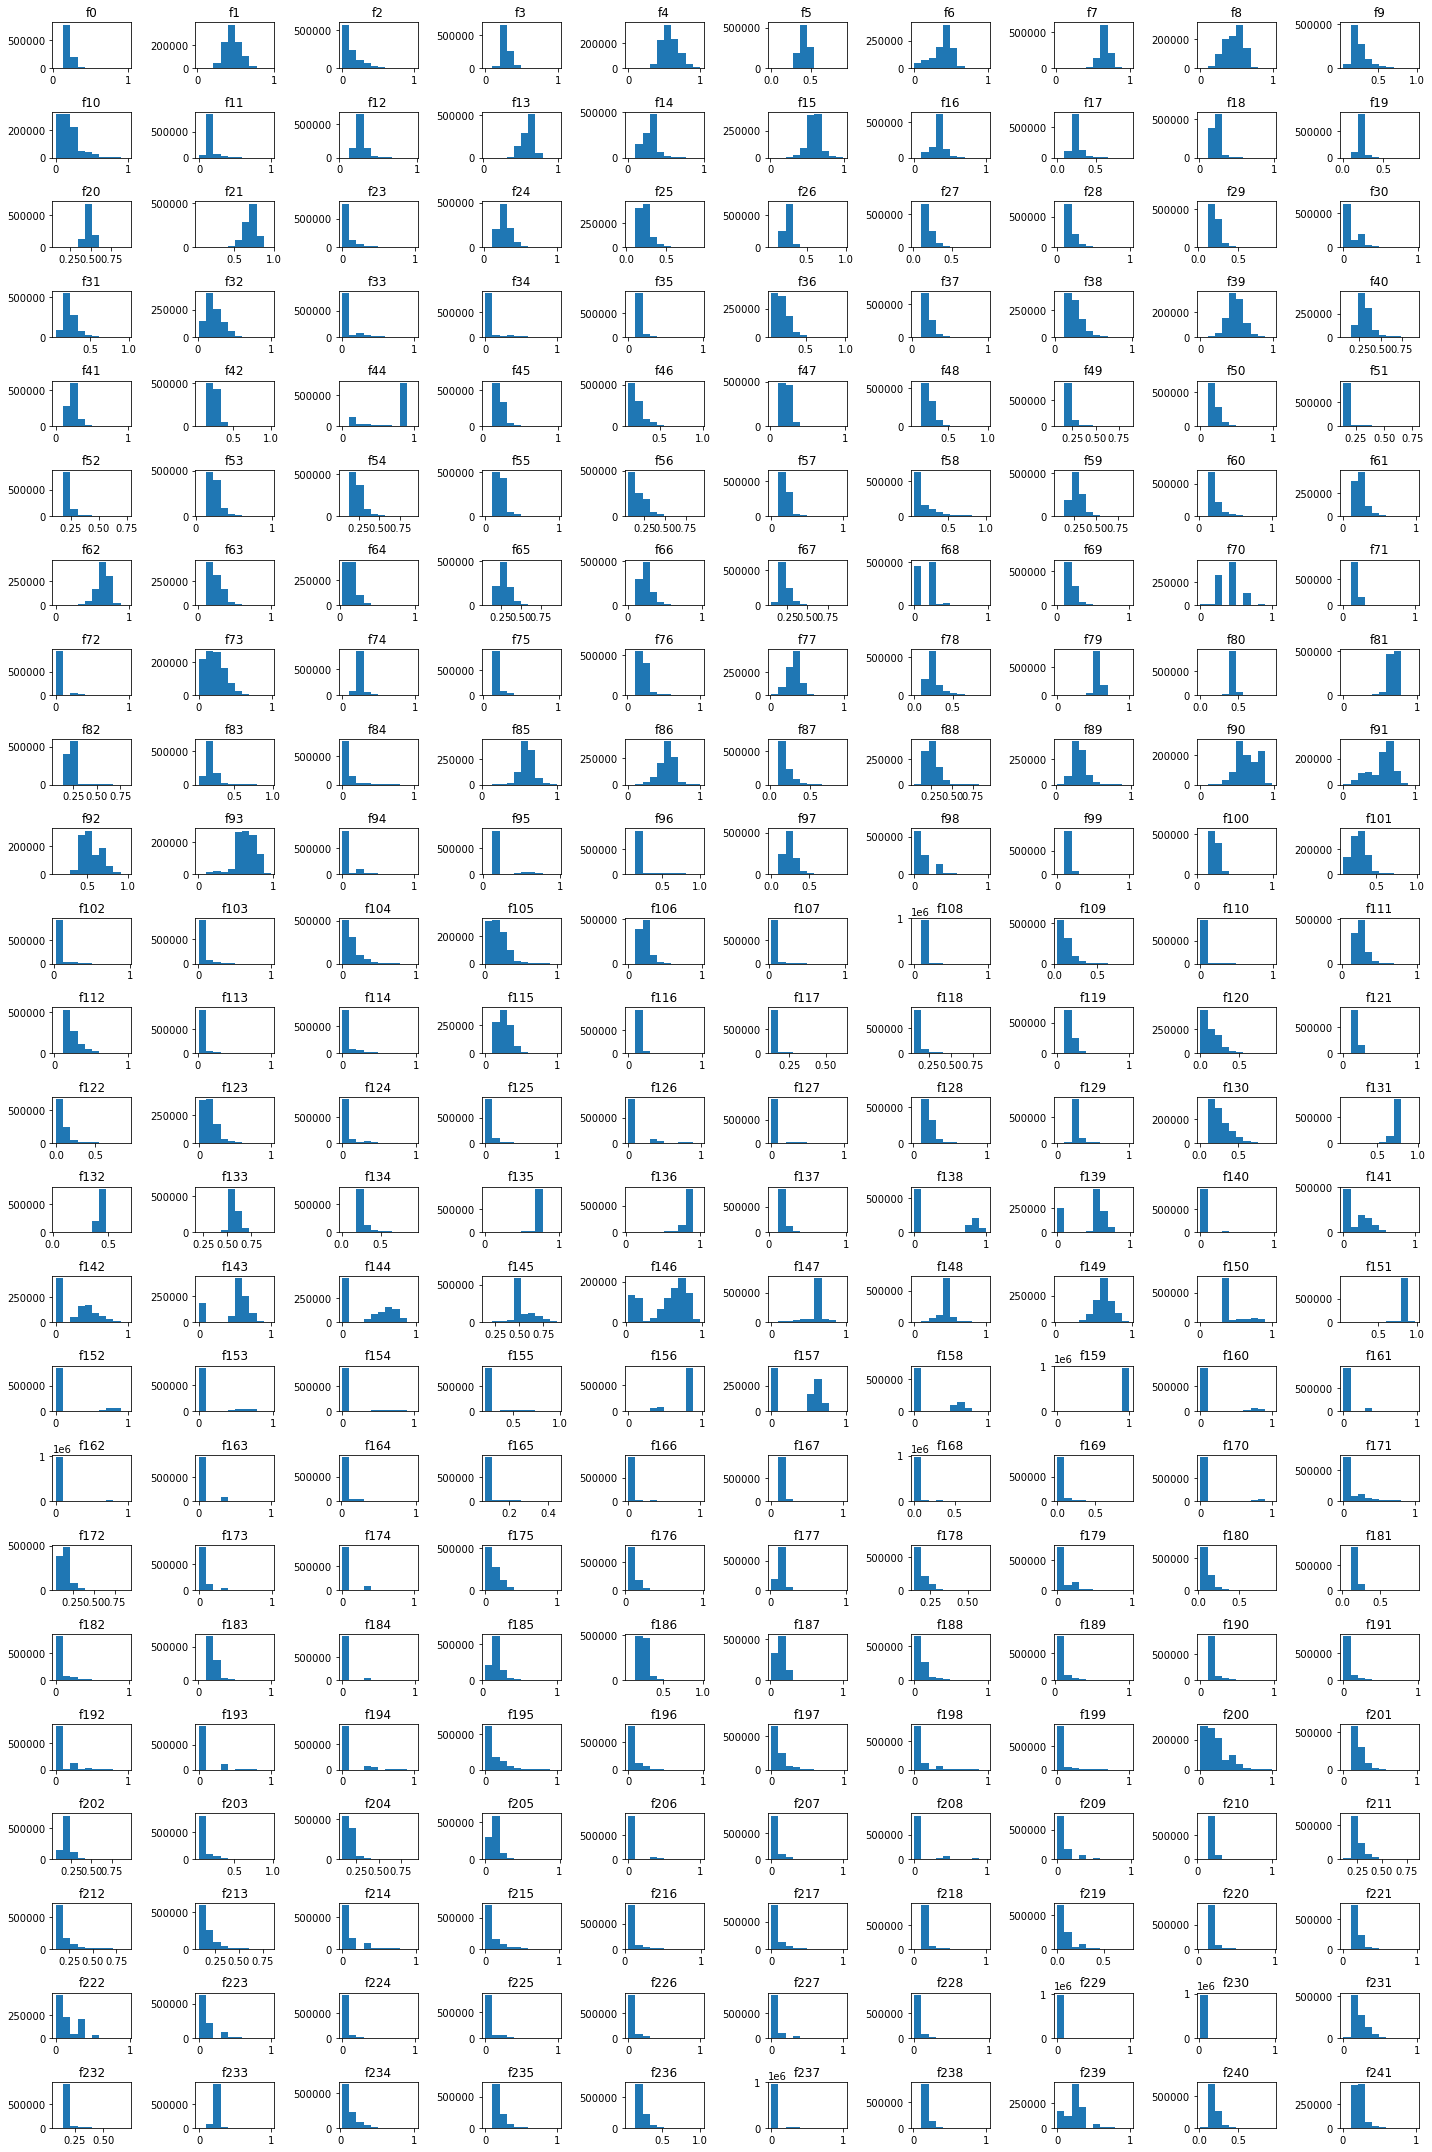

In [6]:
fig, ax = plt.subplots(24, 10, figsize=(20, 30))

for i, column in enumerate(continuos_features):
    ax[i // 10, i % 10].hist(train[column])
    ax[i // 10, i % 10].set_title(column)
fig.tight_layout()
plt.show()

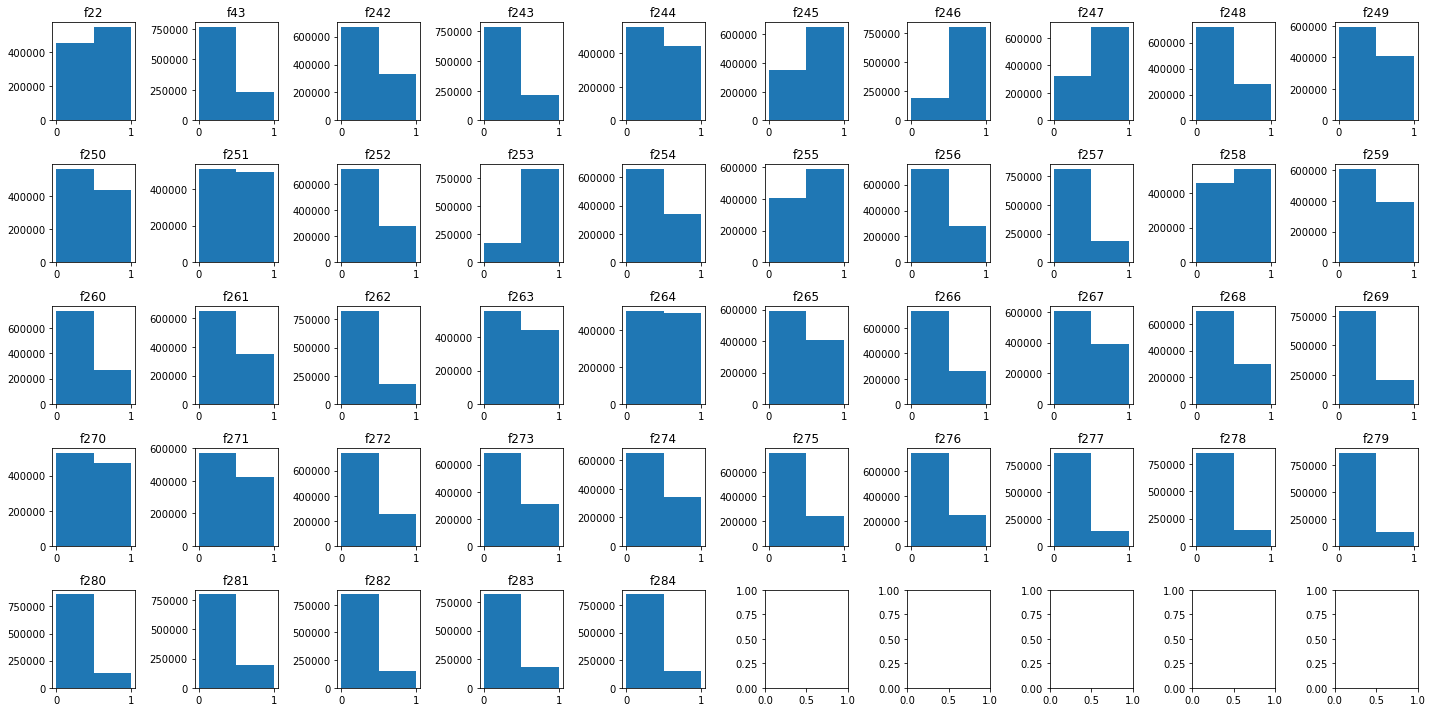

In [7]:
fig, ax = plt.subplots(5, 10, figsize=(20,10))
for i, column in enumerate(binary_features):
    ax[i // 10, i % 10].hist(train[column],bins = 2)
    ax[i // 10, i % 10].set_title(column)

plt.tight_layout()
plt.show()

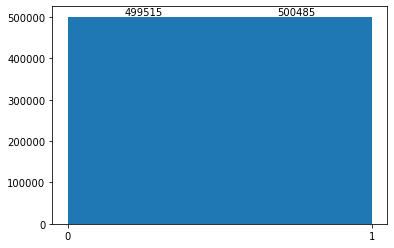

In [8]:
counts, edges, bars = plt.hist(train['target'],bins = 2)
plt.bar_label(bars)
plt.xticks([0, 1])
plt.show()

- There are 1 million records in the dataset
- There are 285 features, with 45 binary features and 240 continuous features
- The 'target' is binary
- There are no missing values in the dataset.

# Analysis & Validation

- I will be using logistic regression to analyze this dataset because it can provide binary output, handle both binary and continuous features, and is suitable for handling a large number of features.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, auc
import pickle


In [9]:
def save_model(model,path):
    with open(path,'wb') as f:
        pickle.dump(model,f)
    print('The saving has been completed.')

def load_model(path):
    with open(path,'rb') as f:
        loaded = pickle.load(f)
    print('The loading has been completed.')
    return loaded

In [5]:
X = train[list(train.columns)[1:-1]]  # Features
y = train[list(train.columns)[-1]]  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800000, 285)
(200000, 285)
(800000,)
(200000,)


In [6]:
#Create LogisticRegression
model = LogisticRegression()
model_name = model.__class__.__name__

#Train the model
model.fit(X_train,y_train)
save_model(model,model_name+'_trained.pkl')
print("train is done")

The saving has been completed.
train is done


d:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# Make predictions
#model = load_model(model.__class__.__name__+'_trained.pkl')
y_pred_train = model.predict(X_train)
y_pred_prob_train = model.predict_proba(X_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
print("predict is done")

predict is done


In [13]:
print('Training Set')
print(classification_report(y_train,y_pred_train)) 
print('AUC Score',roc_auc_score(y_train,y_pred_train, multi_class = 'ovo'))
print('')
print('Test Set')
print(classification_report(y_test,y_pred)) 
print('AUC Score',roc_auc_score(y_test,y_pred, multi_class = 'ovo'))

Training Set
              precision    recall  f1-score   support

           0       0.75      0.79      0.77    399502
           1       0.78      0.73      0.75    400498

    accuracy                           0.76    800000
   macro avg       0.76      0.76      0.76    800000
weighted avg       0.76      0.76      0.76    800000

AUC Score 0.7614579008912828

Test Set
              precision    recall  f1-score   support

           0       0.75      0.79      0.77    100013
           1       0.78      0.73      0.75     99987

    accuracy                           0.76    200000
   macro avg       0.76      0.76      0.76    200000
weighted avg       0.76      0.76      0.76    200000

AUC Score 0.7613056682660658


# Submission file

In [14]:
testf = test[test.columns[1:]]
submid = sample_submid['id']
submid = pd.DataFrame(submid)
predict_test = model.predict(testf)
submid['target'] = predict_test

In [27]:
submid

,id,target
0,1000000,1
1,1000001,0
2,1000002,1
3,1000003,1
4,1000004,0
...,...,...
499995,1499995,1
499996,1499996,1
499997,1499997,0
499998,1499998,1


In [29]:
submid.to_csv('out.csv',index = False)